### Using Hierarchical Clustering

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('OASIS 3 and 4/OASIS3_UDSb1_physical_eval.csv')
df.drop('HEARWAID', axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)
df.isnull().sum()
df.drop('OASISID', axis=1, inplace=True)
df.drop('OASIS_session_label', axis=1, inplace=True)
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

C:\Users\Ananya\AppData\Local\Temp\ipykernel_26268\467579020.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


##### Calculating Euclidian Distance

In [3]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise Euclidean distances
euclidean_distances = pdist(df, metric='euclidean')

# If you want a square distance matrix, use squareform
euclidean_distance_matrix = squareform(euclidean_distances)


Creating Dendrogram:   0%|          | 0/100 [00:00<?, ?it/s]

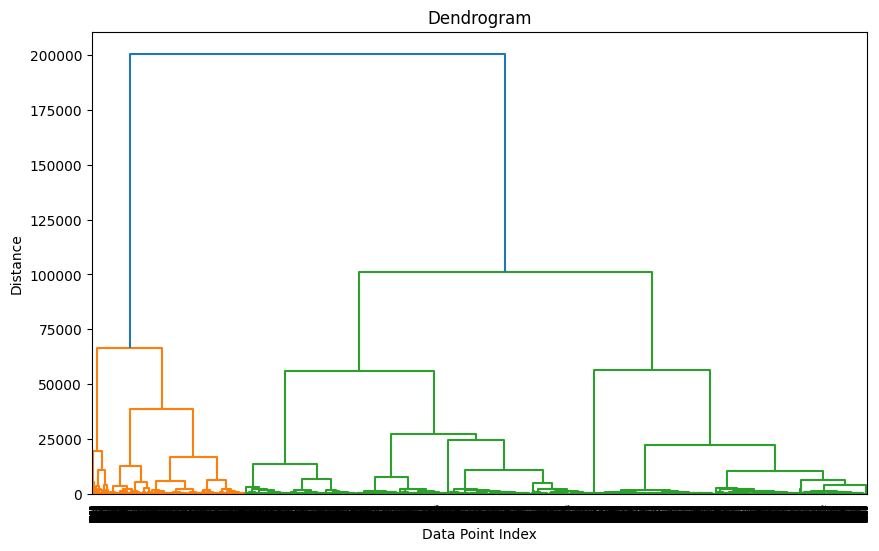

In [4]:
# from scipy.spatial.distance import squareform
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
# import time

# # Convert your condensed distance matrix to a square distance matrix
# euclidean_distance_matrix = squareform(euclidean_distance_matrix)

# # Create a linkage matrix from the square distance matrix
# linkage_matrix = linkage(euclidean_distance_matrix, method='ward')

# # Create a function to display a dendrogram with a progress bar
# def plot_dendrogram():
#     plt.figure(figsize=(10, 6))
#     dendrogram(linkage_matrix)
#     plt.xlabel('Data Point Index')
#     plt.ylabel('Distance')
#     plt.title('Dendrogram')
#     plt.show()

# # Use tqdm to show a progress bar while creating the dendrogram
# for i in tqdm(range(100), desc="Creating Dendrogram"):
#     time.sleep(0.01)

# # Plot the dendrogram
# plot_dendrogram()


##### Determining the optimal number of clusters

##### 1. Dendrogram

In [5]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# import matplotlib.pyplot as plt

# # Create a linkage matrix from the distance matrix
# linkage_matrix = linkage(euclidean_distance_matrix, method='ward')

# # Plot the dendrogram
# dendrogram(linkage_matrix)
# plt.xlabel('Data Point Index')
# plt.ylabel('Distance')
# plt.title('Dendrogram')
# plt.show()


In [10]:
# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
# from scipy.spatial.distance import pdist

# # Create a linkage matrix using your hierarchical clustering method (e.g., 'ward')
# linked = linkage(df, method='ward')

# # Calculate cophenetic correlation coefficient
# c, coph_dists = cophenet(linked, pdist(df))

# # Print the coefficient
# print(f'Cophenetic Correlation Coefficient: {c:.2f}')


Cophenetic Correlation Coefficient: 0.70


##### Elbow Method

In [13]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Reshape the distance matrix to a 2D array
euclidean_distance_matrix_2d = euclidean_distance_matrix.reshape(-1, 1)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Use the elbow method to determine the optimal number of clusters
for i in range(1, 11):
    model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    model.fit(euclidean_distance_matrix_2d)
    wcss.append(model.inertia_)

# Plot the results on an elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


MemoryError: Unable to allocate 4.92 PiB for an array with shape (691906031470500,) and data type float64

##### Silhoutte Score

In [8]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for n_clusters in range(2, 11):
#     model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#     cluster_labels = model.fit_predict(euclidean_distance_matrix)
#     silhouette_avg = silhouette_score(euclidean_distance_matrix, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we started from 2 clusters
# print("Best number of clusters:", best_n_clusters)

In [9]:
# import pandas as pd
# from sklearn.cluster import AgglomerativeClustering
# from scipy.spatial.distance import pdist, squareform
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram
# from scipy.cluster.hierarchy import linkage

# # Perform hierarchical clustering
# n_clusters = 2  # Choose the number of clusters
# model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
# clusters = model.fit_predict(squareform(euclidean_distances))

# # Visualization (optional)
# dendrogram_ = dendrogram(linkage(euclidean_distances, method='ward'))

# # Plot dendrogram
# plt.show()

# # The 'clusters' variable contains cluster assignments for each data point
